# 📘 System Identification: Transfer Function Fitting> Fit dynamic system models to step response data⏱️ **20-30 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Engineering**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/engineering/system_identification.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $y(t) = K(1 - e^{-t/\tau})$ (First-order system)**Applications:** Control systems, process dynamics---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def first_order_step(t, K, tau):
    return K * (1 - jnp.exp(-t/tau))

## Generate Step Response Data

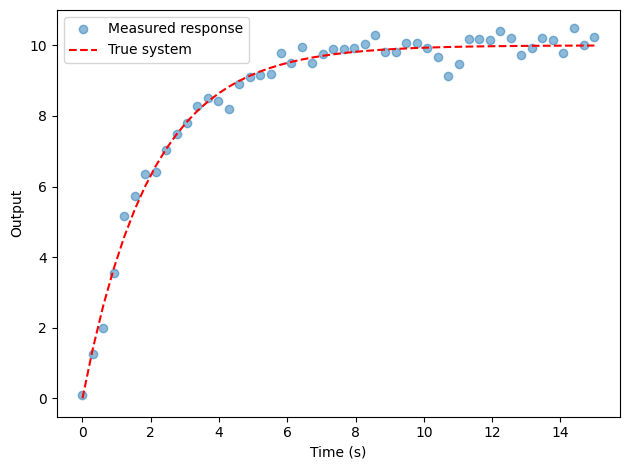

In [5]:
K_true, tau_true = 10.0, 2.0  # Gain, time constant
t = np.linspace(0, 15, 50)
y_true = first_order_step(t, K_true, tau_true)
y = y_true + np.random.normal(0, 0.3, len(t))

plt.plot(t, y, 'o', alpha=0.5, label='Measured response')
plt.plot(t, y_true, 'r--', label='True system')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.show()


## Identify System Parameters

In [6]:
popt, pcov = curve_fit(first_order_step, t, y, p0=[9, 1.5])
K_fit, tau_fit = popt
perr = np.sqrt(np.diag(pcov))

print('System Parameters:')
print(f'  Gain (K):         {K_fit:.2f} ± {perr[0]:.2f}')
print(f'  Time constant (τ): {tau_fit:.2f} ± {perr[1]:.2f} s')
print(f'\nSettling time (5τ): {5*tau_fit:.1f} s')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=17.182068554394604 | grad_norm=30.6465 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=2.0389393122520767 | grad_norm=1.7000 | step=9.12414379544733 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=1.9960923162937112 | grad_norm=0.0062 | step=9.12414379544733 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=1.99609064516354 | grad_norm=1.3307e-04 | step=9.12414379544733 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.357857s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=1.9961 | elapsed=1.358s | final_gradient_norm=2.0468e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.031007s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.0310 | final_cost=3.9922 | covariance_warning=False


System Parameters:
  Gain (K):         10.04 ± 0.06
  Time constant (τ): 2.01 ± 0.06 s

Settling time (5τ): 10.1 s


## Key Insights1. **Gain K** = steady-state output2. **Time constant τ** = 63.2% rise time3. **5τ rule** for settling time---